## Setting up

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We decided to configure out settings exactly like we did for A2

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Wrangling

We have two main files in our data set: googleplaystore.csv and googleplaystore_user_reviews.csv.

For an analysis of app names, we can focus on just the first data set. The second data set gives us reviews of each app, which is not needed for this project.

In [3]:
df = pd.read_csv("gpsa/googleplaystore.csv")

In [4]:
# Get a grasp on the size of the dataset
df.shape

(10841, 13)

In [5]:
# Preview dataset
df.head

<bound method NDFrame.head of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
...                                                  ...                  ...   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews         ...                             Genres  \
0         4.1     159         ...                       Art & Design   
1         3.9     967         ...          Art & Design;Pretend Play   
2         4.7   87510         ...                       Art & Design   
...       ...     ...         ...

In [6]:
# Show the headers of the different columns
print(list(df.columns.values))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [7]:
# Remove any duplicate applications
# We only want to account for each app once 
df.drop_duplicates(['App'], inplace = True)

In [8]:
# We decided that we only need the app names, ratings, and number of installations. 
df = df[['App', 'Rating', 'Installs']]

After previewing our dataset, we realized that it has a lot of data we do not need.

The __'Size'__ of apps, the __'Type'__ (either free or paid), __'Price'__, __'Content Rating'__ (as in the rating for the suggested age group), the date of when they were __'Last Updated'__, the __'Genres'__ and __'Category'__, and the versions (__'Current Ver'__ and __'Android Ver'__) have little to do with our analysis of specific characterisitcs of the length of title strings, so those columns were dropped.

Our project seeks to see any relationship between characteristics of apps' titles with their success. However, we do not have any direct measure of this ___"Success"___. We decided to keep the __'Rating'__ and __'Installs'__ columns to determine ___"Success"___, but we still want to look at the distributions/correlations of these variables before committing to a formula.

In [9]:
# Count amount of missing values in the dataset 
app_nans = df['App'].isna().sum()
rating_nans = df['Rating'].isna().sum()
installs_nans = df['Installs'].isna().sum()
print("app_nans:", app_nans,"\nrating_nans:", rating_nans,"\ninstalls_nans:", installs_nans)

app_nans: 0 
rating_nans: 1463 
installs_nans: 0


There seems to be a considerable amount of observations with missing values. However, the only column in our current dataset that has missing values is __'Ratings'__. Since we absolutely need ratings values for every observation that we have, we will drop all of the observations without them.

In [10]:
# Drops observations missing 'Ratings' data
df = df.dropna()

In [11]:
# Preview the dataframe
df.head

<bound method NDFrame.head of                                                      App  Rating     Installs
0         Photo Editor & Candy Camera & Grid & ScrapBook     4.1      10,000+
1                                    Coloring book moana     3.9     500,000+
2      U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7   5,000,000+
...                                                  ...     ...          ...
10837                   Fr. Mike Schmitz Audio Teachings     5.0         100+
10839                      The SCP Foundation DB fr nn5n     4.5       1,000+
10840      iHoroscope - 2018 Daily Horoscope & Astrology     4.5  10,000,000+

[8197 rows x 3 columns]>

# Data Pre-Processing and Exploratory Data Analysis

It turns out that the 'Installs' column is a column of strings instead of integers. We want to convert these strings into numeric values so that we can plot them.

In [12]:
# Delete the '+' chars that are in these strings in 'Installs'
df['Installs'] = df['Installs'].str.replace('+', '')
# Delete the ',' chars that are in these strings in 'Installs'
df['Installs'] = df['Installs'].str.replace(',', '')

# Type cast these strings into integers
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Preview the dataframe
# Values in 'Installs' should be numeric
df.head

<bound method NDFrame.head of                                                      App  Rating  Installs
0         Photo Editor & Candy Camera & Grid & ScrapBook     4.1  1.00e+04
1                                    Coloring book moana     3.9  5.00e+05
2      U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7  5.00e+06
...                                                  ...     ...       ...
10837                   Fr. Mike Schmitz Audio Teachings     5.0  1.00e+02
10839                      The SCP Foundation DB fr nn5n     4.5  1.00e+03
10840      iHoroscope - 2018 Daily Horoscope & Astrology     4.5  1.00e+07

[8197 rows x 3 columns]>

Since we need some measures of title length, we will create two columns: __'Word Count'__ (counts the number of words in the title) and __'Char Count'__ (counts the number of characters in the title).

In [13]:
# Create the word count column 
df['Word Count'] = df['App'].str.split().str.len()

In [14]:
# Create the char count column 
df['Char Count'] = df['App'].str.len() - df['App'].str.count(' ')

In [15]:
# Preview table again to check for these columns
df.head

<bound method NDFrame.head of                                                      App  Rating  Installs  \
0         Photo Editor & Candy Camera & Grid & ScrapBook     4.1  1.00e+04   
1                                    Coloring book moana     3.9  5.00e+05   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7  5.00e+06   
...                                                  ...     ...       ...   
10837                   Fr. Mike Schmitz Audio Teachings     5.0  1.00e+02   
10839                      The SCP Foundation DB fr nn5n     4.5  1.00e+03   
10840      iHoroscope - 2018 Daily Horoscope & Astrology     4.5  1.00e+07   

       Word Count  Char Count  
0               9          38  
1               3          17  
2              10          41  
...           ...         ...  
10837           5          28  
10839           6          24  
10840           7          39  

[8197 rows x 5 columns]>

We also want to add columns regarding the frequency of certain letters and letter pairs.

The code below creates many columns with binary variables depending on the presence of letters and letter pairs. For example, values in column 'a' are equal to 1 if 'a' is contained in apps name and 0 otherwise, and values in column 'wq' are equal to 1 if 'wq' is contained in apps name and 0 otherwise.

Then, we count how many ones are in each of the created columns to assess if the column is useful. If there are not a lot of ones in a column (less than 0.025 * (# of rows) for example) or too many (more than 0.975 * (# of rows) for example), we remove such columns. This is done because, for example, there are not a lot of titles with 'wq' inside them so 'wq' column is not useful for our analysis

In [16]:
import string
alphabet = list(string.ascii_lowercase)

for k in alphabet:
    q1 = []
    for i in df['App']:
        if k in i:
            q1.append(1)
        else:
            q1.append(0)
    df[k] = q1

alphabet1 = []
for i in alphabet:
    for k in alphabet:
        alphabet1.append(i + k)
        
for k in alphabet1:
    q2 = []
    for i in df['App']:
        if k in i:
            q2.append(1)
        else:
            q2.append(0)
    df[k] = q2


rem_list = []                           ##here 13 and 715 are indexes of first and last created columns  
for i in range(13,707):                 ##it is possible when you will try to execute code you will need to insert proper values 
    if sum(df[df.columns[i]]) < 0.025*df.shape[0] or sum(df[df.columns[i]]) > 0.975*df.shape[0]:
        rem_list.append(i)


s = 0
for i in rem_list:
    i = i - s
    del df[df.columns[i]]
    s += 1

In [17]:
# Preview new dataset
print(df.shape)

df.head

(8197, 152)


<bound method NDFrame.head of                                                      App  Rating  Installs  \
0         Photo Editor & Candy Camera & Grid & ScrapBook     4.1  1.00e+04   
1                                    Coloring book moana     3.9  5.00e+05   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...     4.7  5.00e+06   
...                                                  ...     ...       ...   
10837                   Fr. Mike Schmitz Audio Teachings     5.0  1.00e+02   
10839                      The SCP Foundation DB fr nn5n     4.5  1.00e+03   
10840      iHoroscope - 2018 Daily Horoscope & Astrology     4.5  1.00e+07   

       Word Count ...  us  ut  ve  vi  
0               9 ...   0   0   0   0  
1               3 ...   0   0   0   0  
2              10 ...   0   0   1   0  
...           ... ...  ..  ..  ..  ..  
10837           5 ...   0   0   0   0  
10839           6 ...   0   0   0   0  
10840           7 ...   0   0   0   0  

[8197 rows x 152 columns

In [25]:
# Preview the columns some example letters
df[['a','b','c']]

,a,b,c
0,1,0,1
1,1,1,0
2,1,0,1
...,...,...,...
10837,1,0,1
10839,1,0,0
10840,1,0,1


### Let's Start Plotting!

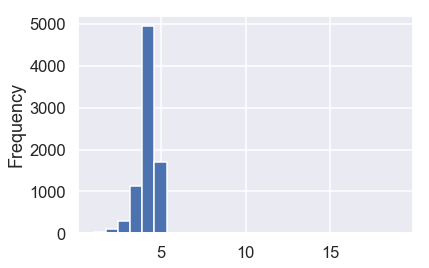

In [19]:
# Plots 'Rating' (which is a value from 0 to 5) to see its distribution
df['Rating'].plot.hist(bins = 25)

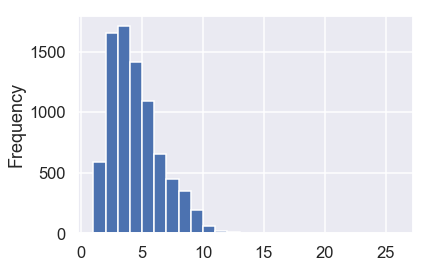

In [20]:
# Plots 'Word Count' to see its distribution
df['Word Count'].plot.hist(bins = 25)

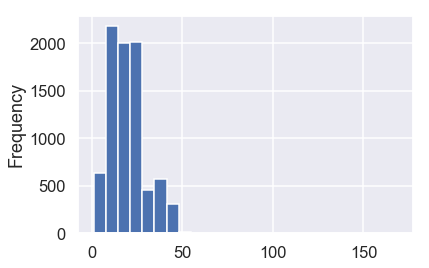

In [21]:
# Plots 'Char Count' to see its distribution
df['Char Count'].plot.hist(bins = 25)

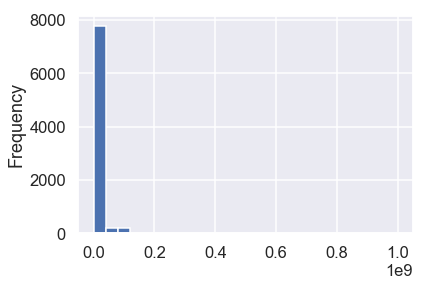

In [26]:
# Plots 'Installs' to see its distribution
df['Installs'].plot.hist(bins = 25)

In [23]:
sns.barplot(x='Category', 
            y='Rating', 
            hue='Rating', 
            data=df);

ValueError: Could not interpret input 'Category'

In [ ]:
x = df['Rating']
y = df['Installs']
plt.scatter(x, y, c='blue')

In [ ]:
# Create a new figure
fig = plt.figure()
# Add an axes to our figureax = plt.axes()
ax = plt.axes()

x = df['Word Count']
y1 = df['Installs']
y2 = df['Rating']

# Plot the data again
ax.scatter(x, y1, c='cyan', alpha=0.6, label='Group 1', s=50)
plt.hold
ax.scatter(x, y2, c='purple', alpha=0.6, label='Group 2', s=50)
# Here we've added some more optional arguments. 
# alpha - sets the transparency of the data points
# label - makes a label for the data we've plotted, which can be used in the legend
# s - size. Changes the size of the dots we plot

# Add a title to our graph
plt.title('Title', fontsize=18, fontweight='bold')

# Add data labels
plt.xlabel('X Data Label', fontsize=16, fontweight='bold')
plt.ylabel('Y Data Label', fontsize=16, fontweight='bold')

# Set the ranges to plot of the x and y variables
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

# Set the tick labels
ax.set_xticks(np.array([5,10,15,20,25,30]))
ax.set_yticks(np.array([1,2,3,4,5]))

# hide grid lines
ax.grid(False)

# Turn the top and right side lines off
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the tick marks to only be on the bottom and the left. 
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Set linewidth of remaining spines
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Add a legend. This will use the labels you defined when you set the data.
plt.legend(loc='upper left', scatterpoints=1, frameon=False)
# Legend doesn't require any arguments. 
# Here we optionally specify where to put the legend ('loc'), how many points to use 
#  in the legend ('scatterpoints'), and wether to have a box around the legend ('frameon')

In [ ]:
df_new = df.groupby('Category').mean()
df_new = df_new[1:]
df_new

In [ ]:
x1 = df_new.index
sns.barplot(x=x1, 
            y='Installs', 
            data=df_new);

In [ ]:
x1 = df_new.index
sns.barplot(x=x1, 
            y='Word Count', 
            data=df_new);

In [ ]:
df_new = df.groupby('Category').count()
df_new = df_new[1:]
df_new

In [ ]:
x1 = df_new.index
sns.barplot(x=x1, 
            y='App', 
            data=df_new);

In [ ]:
df_new = df.groupby('Word Count').mean()
df_new = df_new[1:]
df_new

In [ ]:
x1 = df_new.index
sns.barplot(x=x1, 
            y='Installs', 
            data=df_new);

In [ ]:
x = df['Word Count']
y = df['Installs']
plt.scatter(x, y, c='blue')

In [ ]:
x = df['Char Count']
y = df['Installs']
plt.scatter(x, y, c='blue')